# Mini Project 5-3 Explore Sampling

## Introduction
In this project, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work. 

For this project, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this project includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [1]:
# Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

### Load the dataset

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [7]:
# Import data.
modified_c4_epa_air_quality = pd.read_csv('Modified EPA Air Quality Data.csv')
modified_c4_epa_air_quality.dropna()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
...,...,...,...,...,...,...,...,...
254,2018-01-01,Arizona,Pima,Tucson,CHERRY & GLENN,Carbon monoxide,Parts per million,2.708050
255,2018-01-01,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,1.386294
256,2018-01-01,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,1.098612
257,2018-01-01,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,1.098612


## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, examine the first 10 rows of the data.

In [8]:
# First 10 rows of the data
print(modified_c4_epa_air_quality.head(10))


   date_local    state_name   county_name      city_name  \
0  2018-01-01       Arizona      Maricopa        Buckeye   
1  2018-01-01          Ohio       Belmont      Shadyside   
2  2018-01-01       Wyoming         Teton  Not in a city   
3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4  2018-01-01          Iowa          Polk     Des Moines   
5  2018-01-01        Hawaii      Honolulu  Not in a city   
6  2018-01-01        Hawaii      Honolulu  Not in a city   
7  2018-01-01  Pennsylvania          Erie           Erie   
8  2018-01-01        Hawaii      Honolulu       Honolulu   
9  2018-01-01      Colorado       Larimer   Fort Collins   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste 

### Generate a table of descriptive statistics

Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [10]:
# Code Here

print(modified_c4_epa_air_quality.describe())


          aqi_log
count  260.000000
mean     1.766921
std      0.714716
min      0.000000
25%      1.098612
50%      1.791759
75%      2.302585
max      3.931826


**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

A: The mean value of the aqi_log column is 1.766921 (as given in the descriptive statistics table). The mean value of the aqi column (after reversing the log transformation) is approximately 5.85. 

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

A: Based on the preceding table of descriptive statistics, the count value for the aqi_log column is 260. This indicates that there are 260 recorded observations in the dataset for this variable.

### Use the `mean()` function on the `aqi`  column

Now, use the `mean()` function on the `aqi`  column and assign the value to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [14]:
# Code Here
population_mean = modified_c4_epa_air_quality['aqi_log'].mean()
population_mean

np.float64(1.7669210929985577)

## Step 3: Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [16]:
# Code Here
sampled_data = modified_c4_epa_air_quality['aqi_log'].sample(n=50, replace=True, random_state=42)
sampled_data

102    1.098612
106    3.295837
71     1.098612
188    2.397895
20     0.693147
102    1.098612
121    1.098612
214    1.791759
87     1.791759
99     1.386294
151    2.484907
130    2.484907
149    1.386294
257    1.098612
191    1.098612
160    1.098612
21     0.693147
252    1.386294
235    1.386294
48     1.945910
58     1.386294
169    1.098612
187    1.791759
189    3.044522
174    1.098612
50     1.098612
54     1.098612
243    2.197225
130    2.484907
134    2.397895
20     0.693147
166    1.386294
88     1.945910
13     2.397895
241    1.098612
52     1.386294
91     1.791759
34     2.772589
205    1.386294
80     2.772589
49     0.693147
1      1.791759
53     1.791759
105    1.386294
259    1.098612
190    1.791759
217    0.693147
43     1.791759
161    2.639057
201    2.079442
Name: aqi_log, dtype: float64

### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [17]:
# Code Here
# Output the first 10 rows of the DataFrame. 
print(sampled_data.head(10))


102    1.098612
106    3.295837
71     1.098612
188    2.397895
20     0.693147
102    1.098612
121    1.098612
214    1.791759
87     1.791759
99     1.386294
Name: aqi_log, dtype: float64


**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

A: Since replace=True was used, each row in epa_data had a chance of being randomly selected multiple times.

**Question:** What does `random_state` do?

A: random_state fixes the random seed so that every time you run the code, you get the same randomly selected data.

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [ ]:
# Code Here
# Compute the mean value of the sampled data.
sample_mean = sampled_data.mean()
sample_mean

np.float64(1.6379981384419398)

You have a 95% confidence interval for the mean district literacy rate that stretches from about X % to Y%. 

95% CI: (X, Y)

 **Question:**  Why is `sample_mean` different from `population_mean`?


A: Sampling Variability → The sample is only a subset of the full dataset, so its mean will fluctuate compared to the full population mean. Random Selection → Different samples will contain different values, causing sample_mean to vary.

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [23]:
# Code Here
# Create an empty list and assign it to a variable called `estimate_list`.
estimate_list = []
# Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
for i in range(10000):
    # Within the `for` loop, sample the `aqi_log` column with replacement, using a sample size equal to the number of rows in the `sampled_data` DataFrame. 
    estimate_list.append(modified_c4_epa_air_quality['aqi_log'].sample(n=50, replace=True).mean())


### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [24]:
# Code Here
estimate_df = pd.DataFrame(data={'estimate': estimate_list})
# Output the first 10 rows of the `estimate_df` DataFrame.
estimate_df.head(10)

,estimate
0,1.741648
1,1.628382
2,1.766932
3,1.832670
4,1.632600
5,1.747842
6,1.799571
7,1.752665
8,1.798342
9,1.761397


### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [25]:
# Code Here
# compute the `mean()` of the `estimate` column in the `estimate_df` DataFrame.
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

np.float64(1.7653975153391925)

**Question:** What is the mean for the sampling distribution of 10,000 random samples?

In [26]:
# Code Here
mean_sample_means

np.float64(1.7653975153391925)

**Question:** How are the central limit theorem and random sampling (with replacement) related?

In [ ]:
# Code Here
#Random sampling (with replacement) supports the Central Limit Theorem by ensuring that the distribution of sample means approaches normality, and as the sample size increases, the sample mean converges to the population mean.

A:

### Output the distribution using a histogram

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

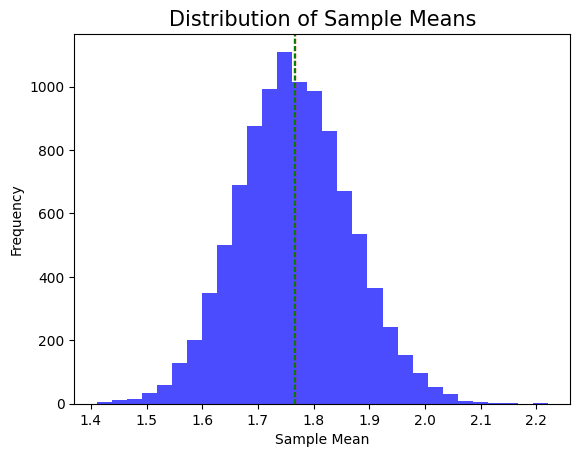

In [32]:
# Code Here
# Create a histogram of the `estimate_list` data using the `plt.hist()` function.
plt.hist(estimate_list, bins=30, color='blue', alpha=0.7, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
# Add a vertical line to the histogram to indicate the population mean.
plt.axvline(x=population_mean, color='red', linestyle='dashed', linewidth=1, label = "population mean")
# Add a vertical line to the histogram to indicate the mean of the sample means.

plt.axvline(x=mean_sample_means, color='green', linestyle='dashed', linewidth=1, label = "mean of sample means")
# Add a title to the histogram.
plt.title('Distribution of Sample Means', size=15)
# Add a label to the x-axis of the histogram.
plt.xlabel('Sample Mean')
# Add a label to the y-axis of the histogram.

plt.ylabel('Frequency')
# Display the histogram.
plt.show()



### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [ ]:
# Code Here
# Calculate the standard error of the sample means.
standard_error = sampled_data.std() / np.sqrt(50)
standard_error

np.float64(0.0945235150131964)

## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

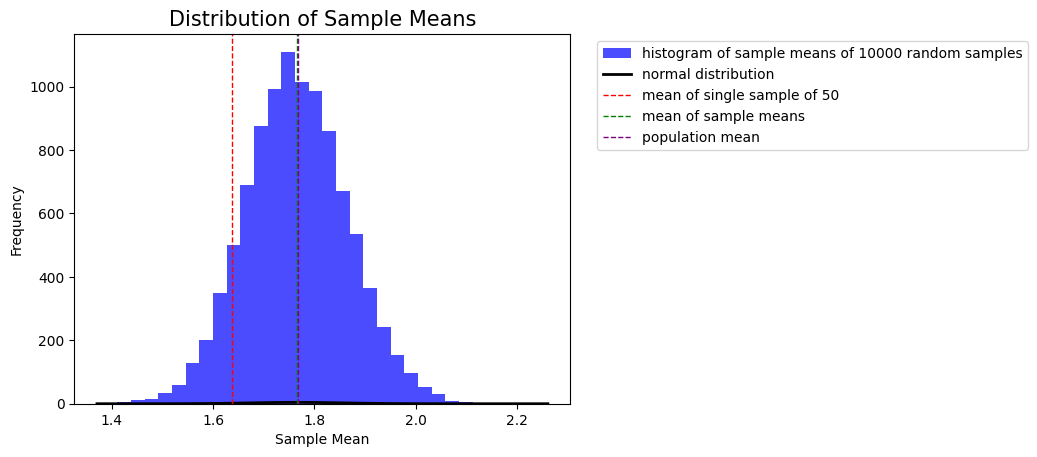

In [35]:
# Code Here
# Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.
#  Plot a histogram of the 10,000 sample means 
plt.hist(estimate_list, bins=30, color='blue', alpha=0.7, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
# Plot the normal distribution
p = stats.norm.pdf(x, mean_sample_means, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = "normal distribution")
# Add a title to the histogram.
plt.title('Distribution of Sample Means', size=15)
# Add a label to the x-axis of the histogram.
plt.xlabel('Sample Mean')
# Add a label to the y-axis of the histogram.
plt.ylabel('Frequency')
# Add a vertical line indicating the mean of the first single sample of 50
plt.axvline(x=sample_mean, color='red', linestyle='dashed', linewidth=1, label = "mean of single sample of 50")
# Add another vertical line indicating the mean of the means of the 10,000 samples 
plt.axvline(x=mean_sample_means, color='green', linestyle='dashed', linewidth=1, label = "mean of sample means")
# Add a third vertical line indicating the mean of the actual population
plt.axvline(x=population_mean, color='purple', linestyle='dashed', linewidth=1, label = "population mean")
# Display the legend
plt.legend(bbox_to_anchor=(1.04,1))
# Display the histogram
plt.show()

**Question:** What insights did you gain from the preceding sampling distribution?

A: The green dashed line (mean of sample means) is very close to the purple dashed line (population mean).
This confirms that taking many random samples produces an accurate estimate of the population mean. The red dashed line (mean of a single sample of 50) is slightly shifted compared to the population mean.
This shows that a single sample may not perfectly estimate the population mean, but when we take many samples, the estimates become more accurate. The spread of the distribution (standard error) is smaller than the original data, meaning the larger the sample size, the more precise the estimate of the population mean.

# Considerations

**What are some key takeaways that you learned from this project?**

A: Central Limit Theorem (CLT) in Action, Importance of Random Sampling (With Replacement), Outlier Detection and Its Impact, Sampling Variability and Mean Estimation, Data Visualization Enhances Understanding.

**What findings would you share with others?**

A: The Central Limit Theorem (CLT) Holds True,  The Mean of Sample Means is Close to the Population Mean, Sampling Variability Exists, But It Decreases With Larger Samples

**What would you convey to external readers?**

A: In this project, we applied statistical sampling techniques to analyze air quality data and ensure accurate insights. Our findings highlight the importance of data-driven decision-making in environmental monitoring and public health.